정상인의 체온이 평균 37.5도, 표준편차가 0.1일때, 정상인의 체온이 37.8도 일 확률

In [1]:
rv = sp.stats.norm(loc=37.5, scale=0.1)

In [2]:
rv.pdf(37.8)

0.044318484119383855

In [4]:
rv_flu = sp.stats.norm(loc=40, scale=0.2)

In [5]:
rv_flu.pdf(38.5)

1.217160266514505e-12

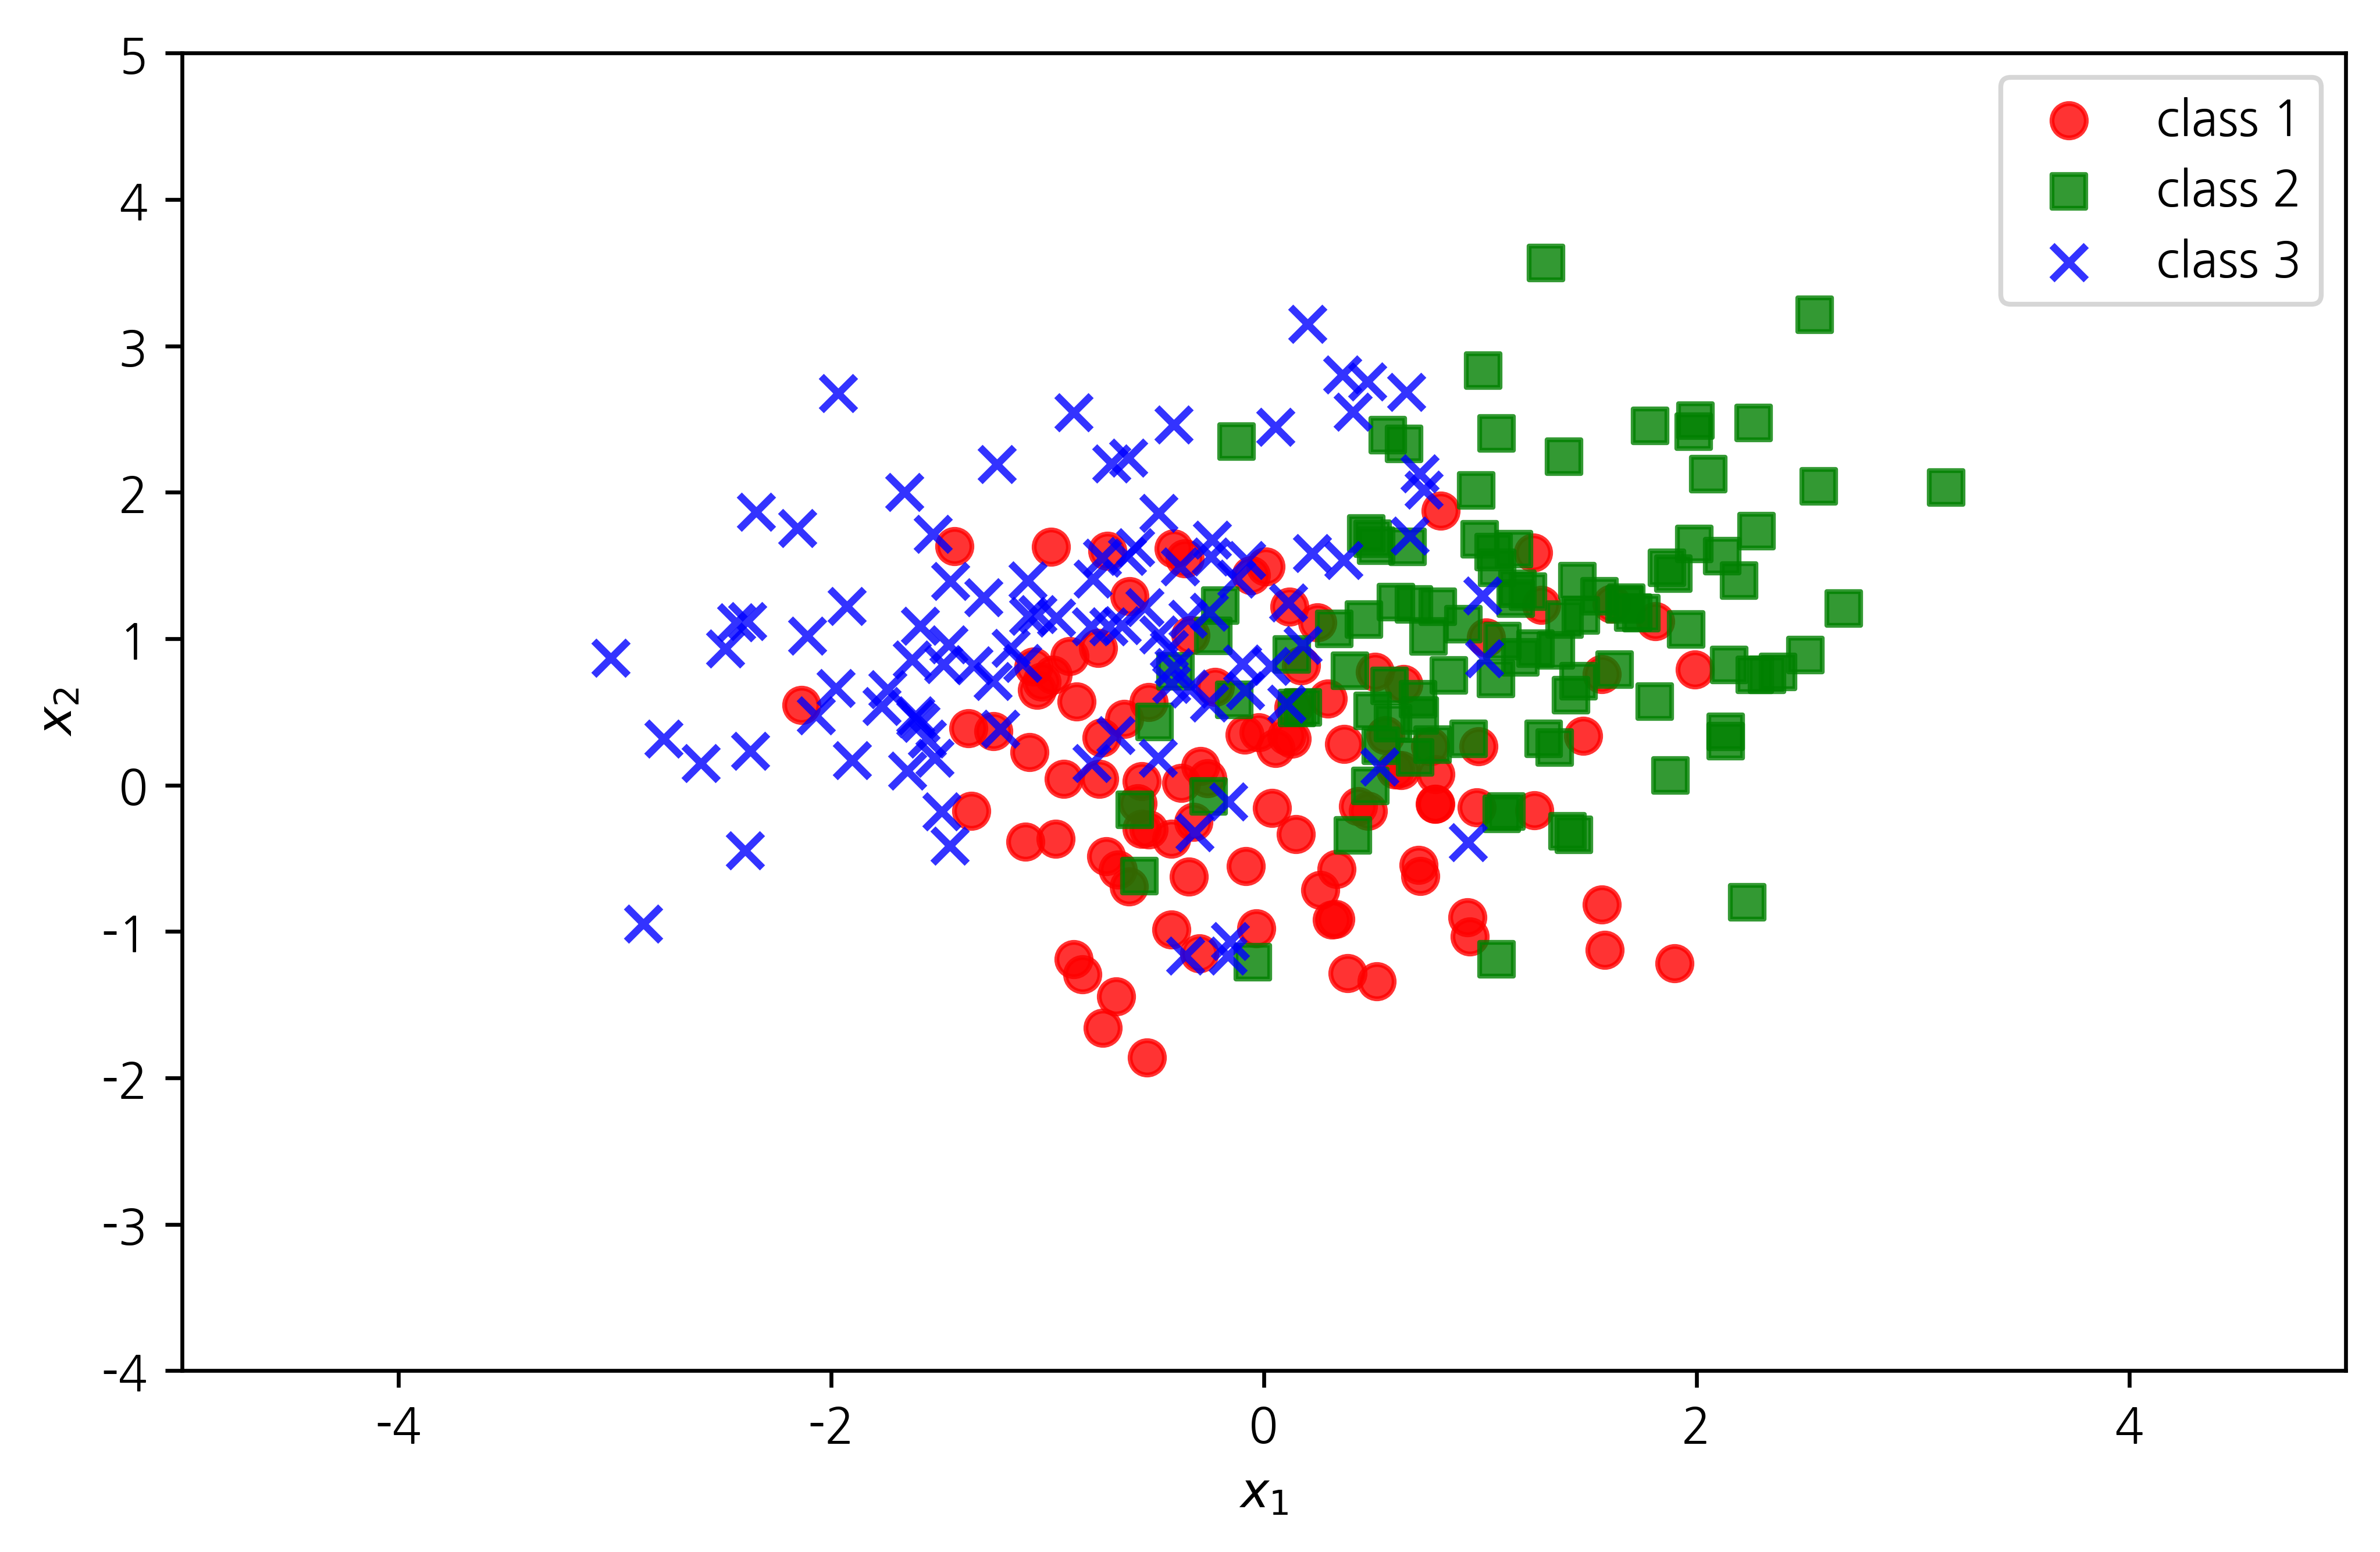

In [6]:
N = 100
rv1 = sp.stats.multivariate_normal([ 0, 0], [[0.7, 0.0], [0.0, 0.7]])
rv2 = sp.stats.multivariate_normal([ 1, 1], [[0.8, 0.2], [0.2, 0.8]])
rv3 = sp.stats.multivariate_normal([-1, 1], [[0.8, 0.2], [0.2, 0.8]])
np.random.seed(0)
X1 = rv1.rvs(N)
X2 = rv2.rvs(N)
X3 = rv3.rvs(N)
y1 = np.zeros(N)
y2 = np.ones(N)
y3 = 2 * np.ones(N)
X = np.vstack([X1, X2, X3])
y = np.hstack([y1, y2, y3])

plt.scatter(X1[:, 0], X1[:, 1], alpha=0.8, s=50, marker="o", color='r', label="class 1")
plt.scatter(X2[:, 0], X2[:, 1], alpha=0.8, s=50, marker="s", color='g', label="class 2")
plt.scatter(X3[:, 0], X3[:, 1], alpha=0.8, s=50, marker="x", color='b', label="class 3")
plt.xlim(-5, 5)
plt.ylim(-4, 5)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.legend()
plt.show()

In [ ]:
# 아래는 교재의 qda.means_ 와 동일

In [7]:
X1.mean(axis=0) # axis=0으로 해야 2차원에서의 평균값을 구할 수 있다?

array([-0.00080125,  0.1194572 ])

In [8]:
X2.mean(axis=0)

array([1.16303727, 1.03930605])

In [9]:
X3.mean(axis=0)

array([-0.8640604 ,  1.02295794])

In [ ]:
# 아래는 교재의 qda.covariance와 동일

In [10]:
np.cov(X1.T)  # 시그마 값

array([[ 0.73846319, -0.01762041],
       [-0.01762041,  0.72961278]])

In [11]:
np.cov(X2.T)

array([[0.66534246, 0.21132313],
       [0.21132313, 0.78806006]])

In [12]:
np.cov(X3.T)

array([[0.9351386 , 0.22880955],
       [0.22880955, 0.79142383]])

```
k=1 이미면서 x1=2, x2=-1 일 확률을 구하라
k=2 이미면서 x1=2, x2=-1 일 확률을 구하라
k=3 이미면서 x1=2, x2=-1 일 확률을 구하라
```

In [13]:
rv1 = sp.stats.multivariate_normal(X1.mean(axis=0), np.cov(X1.T))
rv2 = sp.stats.multivariate_normal(X2.mean(axis=0), np.cov(X2.T))
rv3 = sp.stats.multivariate_normal(X3.mean(axis=0), np.cov(X3.T))
rv1.pdf([2, -1]), rv2.pdf([2, -1]), rv3.pdf([2, -1])

(0.0065621236568562755, 0.0034060346804690644, 1.5412251295786176e-05)

연습문제 1

In [25]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target

In [27]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

model = QuadraticDiscriminantAnalysis().fit(X, y)
y_pred = model.predict(X)

In [28]:
from sklearn.metrics import classification_report
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.98      0.96      0.97        50
           2       0.96      0.98      0.97        50

    accuracy                           0.98       150
   macro avg       0.98      0.98      0.98       150
weighted avg       0.98      0.98      0.98       150



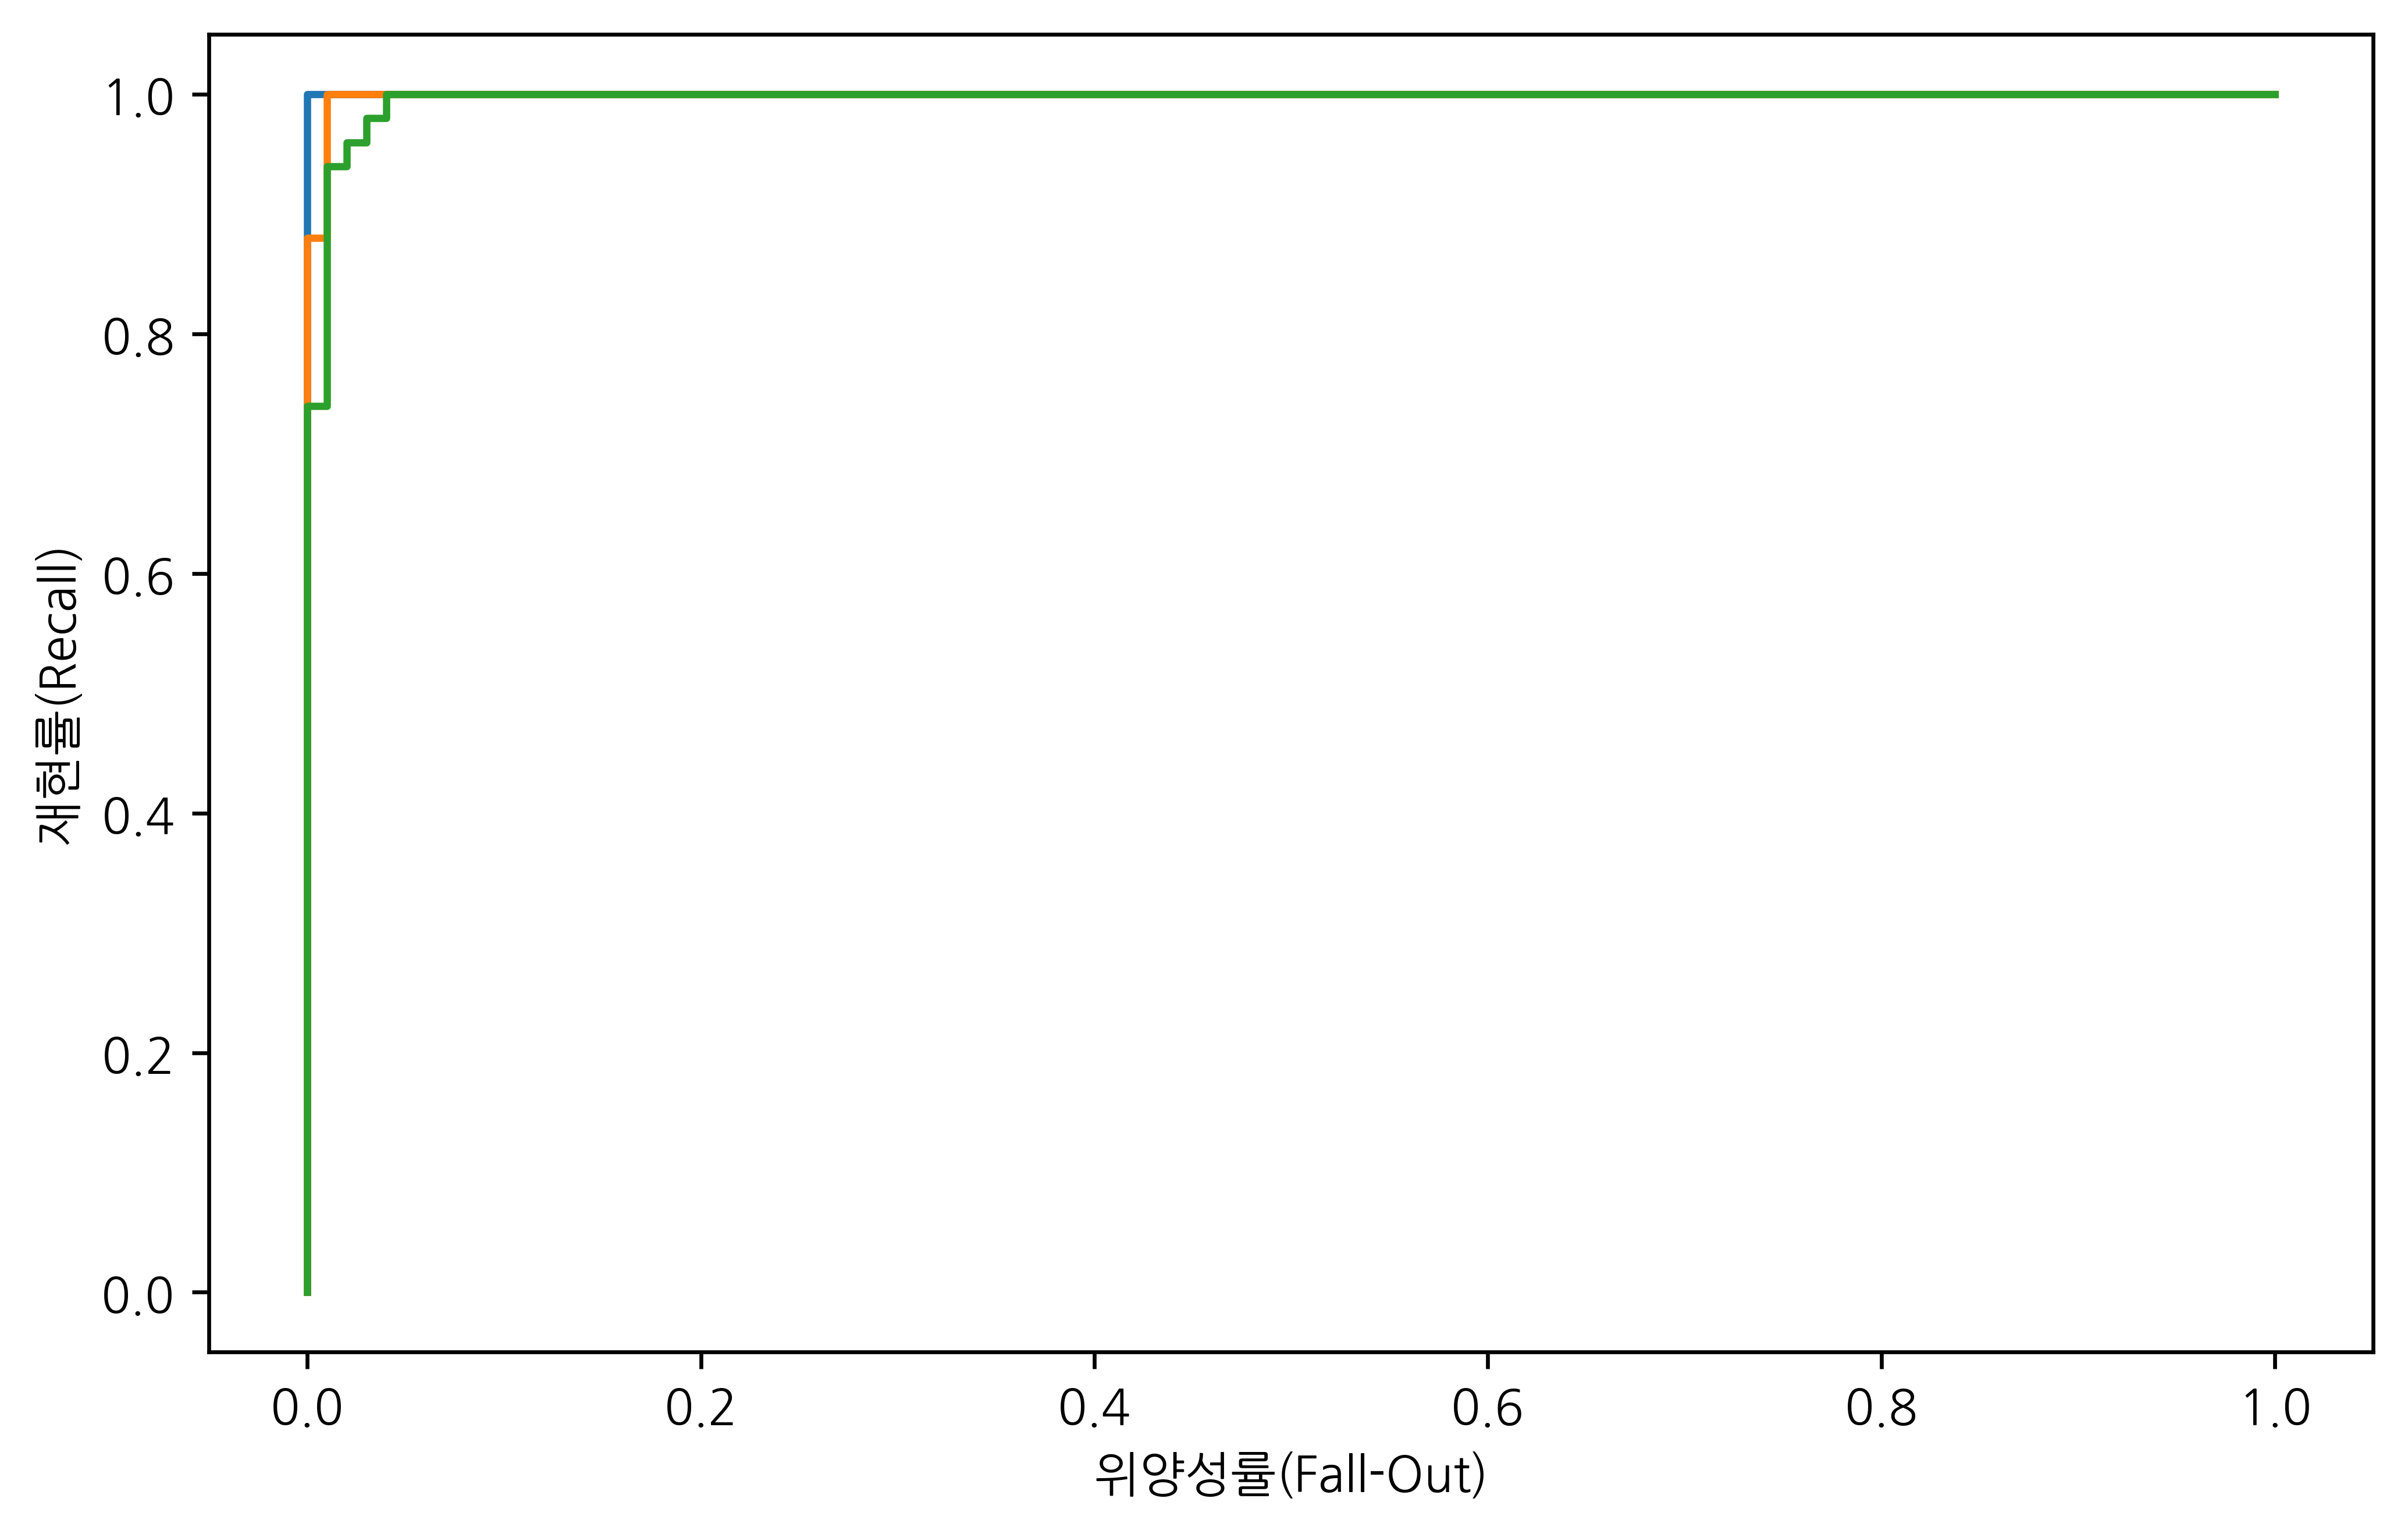

In [24]:
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_iris
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

iris = load_iris()
X = iris.data
y = label_binarize(iris.target, [0,1,2]) # 원핫인코딩 해줌

fpr = [None] * 3  # 리스트에 상수곱하면 상수만큼 리스트 생김
tpr = [None] * 3
thr = [None] * 3

for i in range(3):
    
    model = QuadraticDiscriminantAnalysis(store_covariance=True).fit(X, y[:, i])
    fpr[i], tpr[i], thr[i] = roc_curve(y[:, i], model.predict_proba(X)[:, 1])
    plt.plot(fpr[i], tpr[i])
    
plt.xlabel('위양성률(Fall-Out)')
plt.ylabel('재현률(Recall)')
plt.show()

연습문제 2

In [29]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target

In [30]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

model = LinearDiscriminantAnalysis().fit(X, y)
y_pred = model.predict(X)

In [31]:
from sklearn.metrics import classification_report
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.98      0.96      0.97        50
           2       0.96      0.98      0.97        50

    accuracy                           0.98       150
   macro avg       0.98      0.98      0.98       150
weighted avg       0.98      0.98      0.98       150



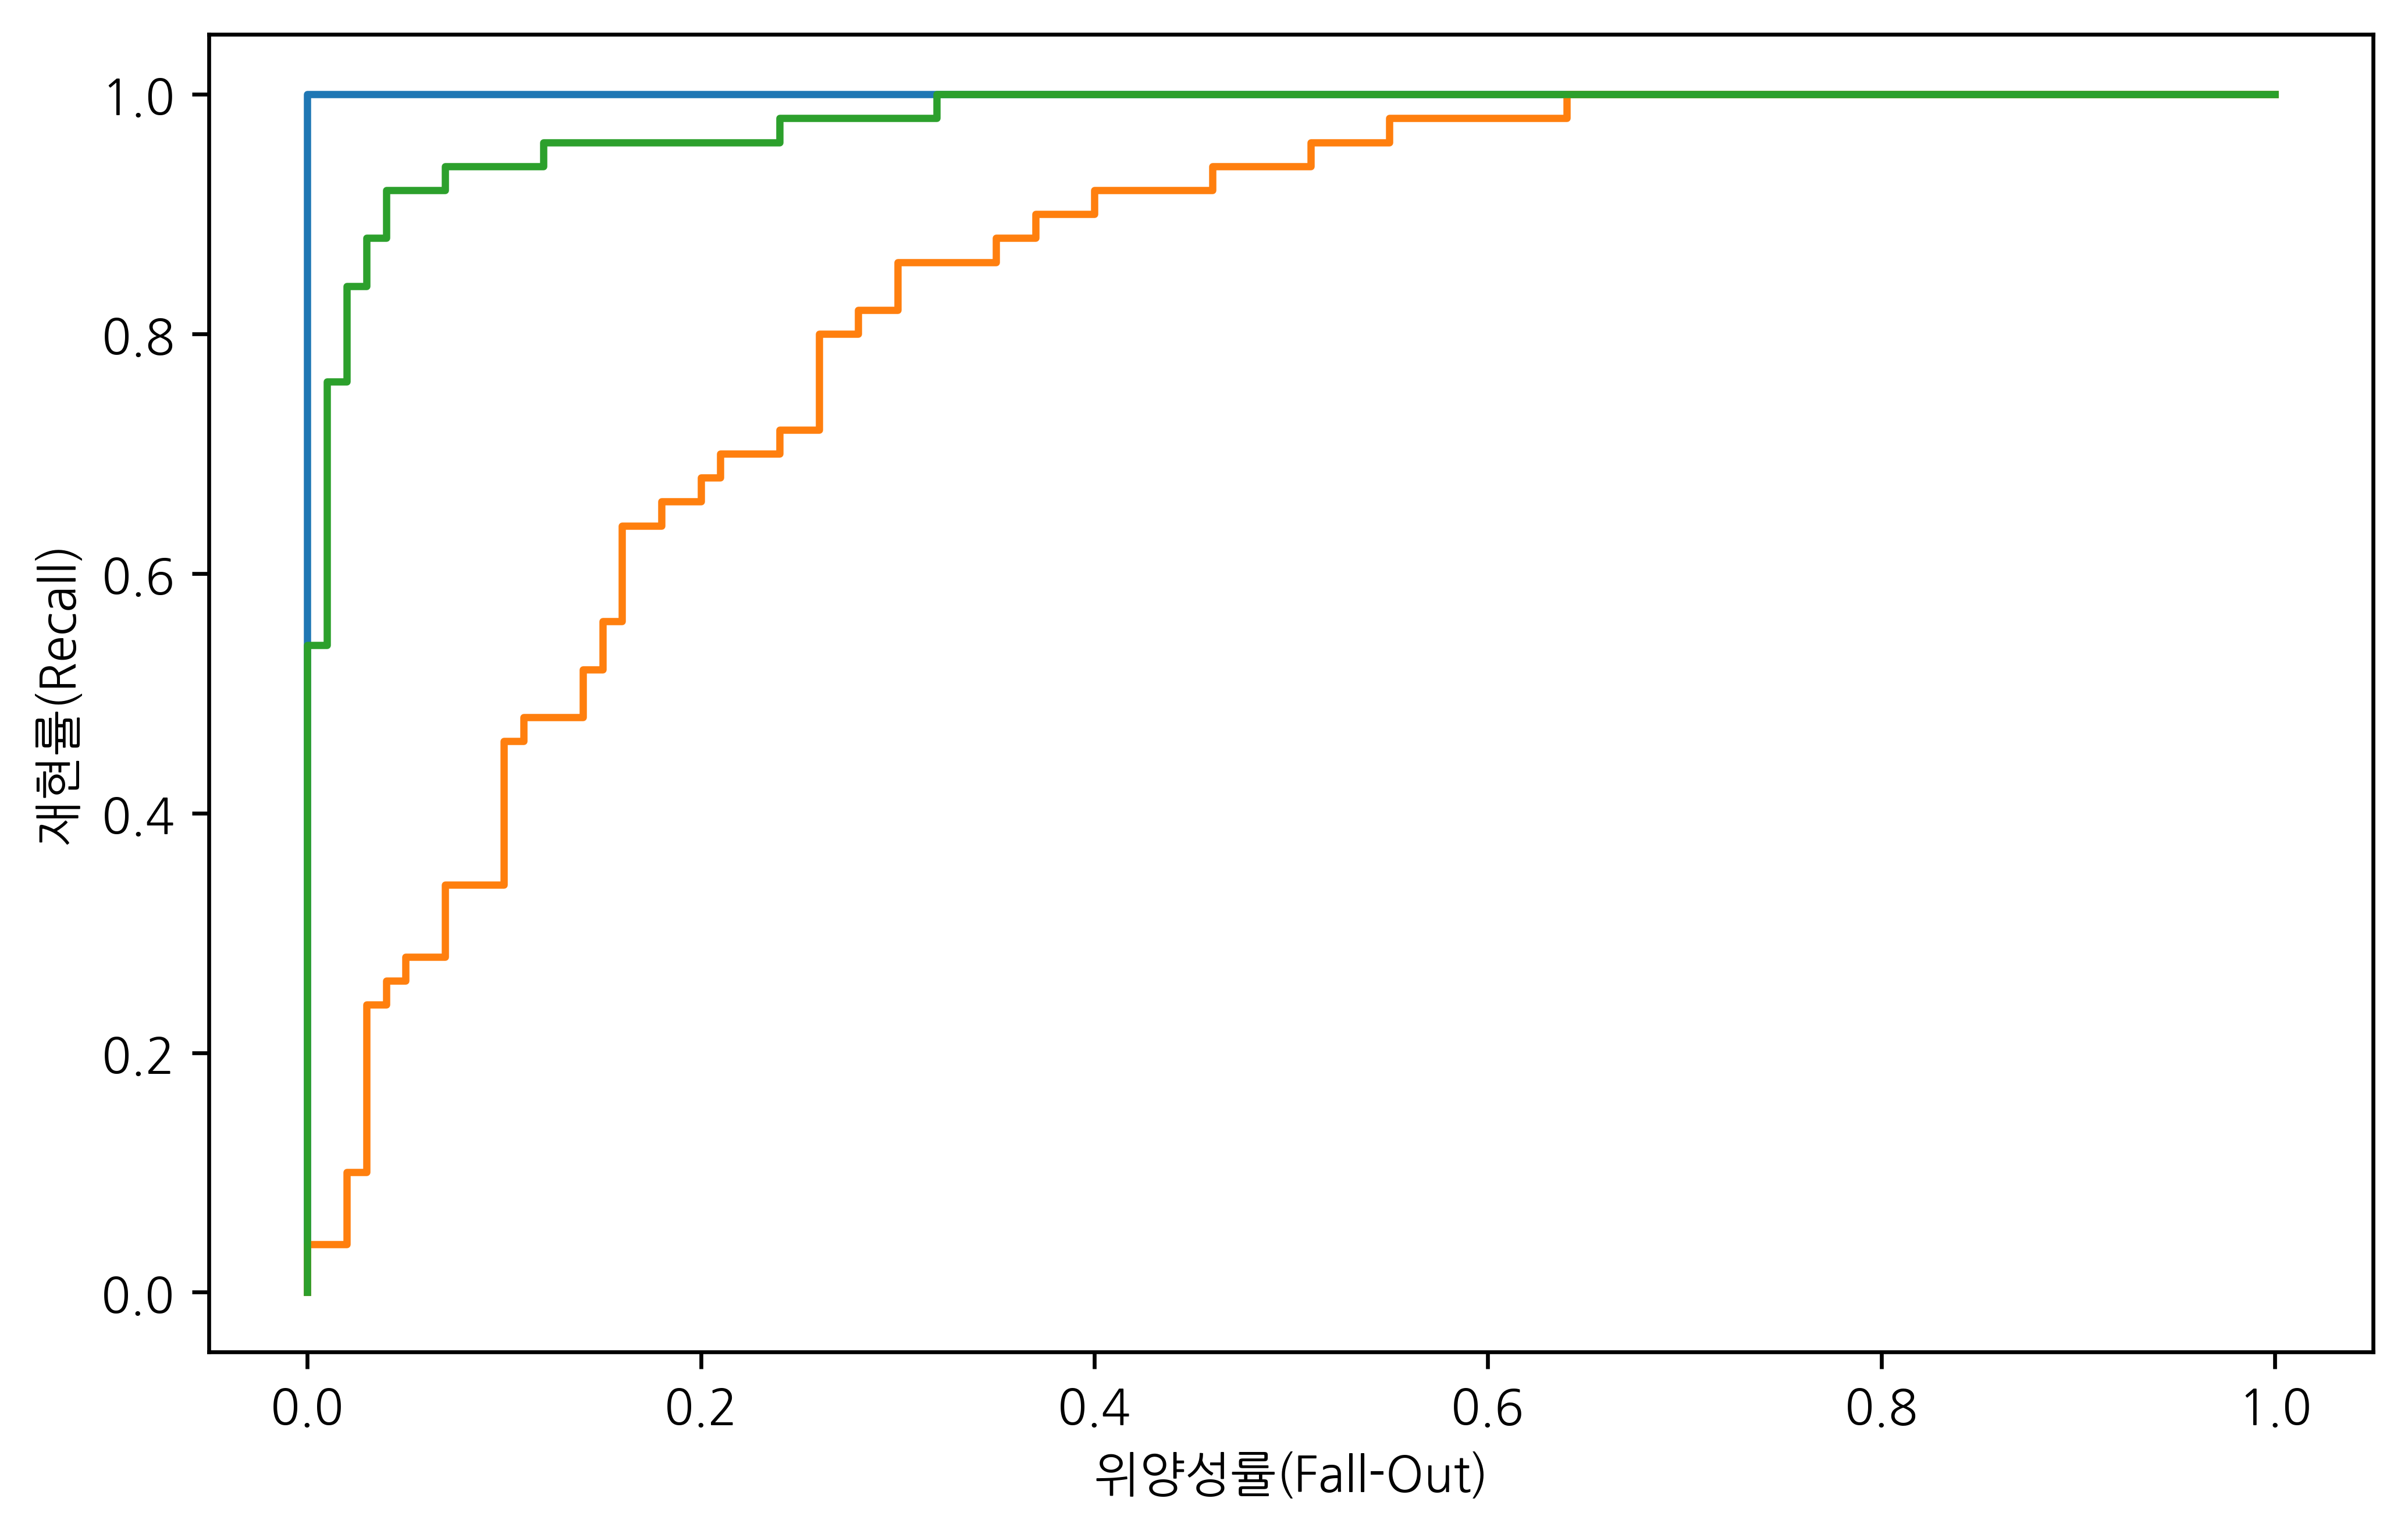

In [32]:
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_iris
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

iris = load_iris()
X = iris.data
y = label_binarize(iris.target, [0,1,2]) # 원핫인코딩 해줌

fpr = [None] * 3  # 리스트에 상수곱하면 상수만큼 리스트 생김
tpr = [None] * 3
thr = [None] * 3

for i in range(3):
    
    model = LinearDiscriminantAnalysis(store_covariance=True).fit(X, y[:, i])
    fpr[i], tpr[i], thr[i] = roc_curve(y[:, i], model.predict_proba(X)[:, 1])
    plt.plot(fpr[i], tpr[i])
    
plt.xlabel('위양성률(Fall-Out)')
plt.ylabel('재현률(Recall)')
plt.show()

### 나이브베이즈 모형

연습문제 1

In [34]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target

from sklearn.naive_bayes import GaussianNB
model_norm = GaussianNB().fit(X, y)

In [35]:
model_norm.class_prior_

array([0.33333333, 0.33333333, 0.33333333])

In [36]:
# 세토사 종의 꽃받침의 길이, 폭, 꽃잎의 길이, 폭의 평균값
# 분산
model_norm.theta_[0], model_norm.sigma_[0]

(array([5.006, 3.428, 1.462, 0.246]),
 array([0.121764, 0.140816, 0.029556, 0.010884]))

In [37]:
# 베르시칼라
model_norm.theta_[1], model_norm.sigma_[1]

(array([5.936, 2.77 , 4.26 , 1.326]),
 array([0.261104, 0.0965  , 0.2164  , 0.038324]))

In [38]:
# 버지니아
model_norm.theta_[2], model_norm.sigma_[2]

(array([6.588, 2.974, 5.552, 2.026]),
 array([0.396256, 0.101924, 0.298496, 0.073924]))

In [41]:
y_pred = model_norm.predict(X)

In [42]:
# 나이브 과정을 썼음에도 결과가 나쁘지 않다.
from sklearn.metrics import classification_report

target_names = {'class 0', 'class 1', 'class 2'}
print(classification_report(y, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00        50
     class 2       0.94      0.94      0.94        50
     class 0       0.94      0.94      0.94        50

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150



연습문제 2

In [43]:
from sklearn.datasets import load_digits
digits = load_digits()

In [46]:
X = digits.data

In [47]:
# 2차원 배열을 플랫하게 1차원 벡터로 만든것
X[0, :]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [69]:
# 바이너라이저를 활용해 8보다 크면 1이되고 8보다 작으면 0이되도록 함
from sklearn.preprocessing import Binarizer
X = Binarizer(7).fit_transform(X)

In [54]:
X[0, :]

array([0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0.,
       0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0.,
       1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0.])

(-0.5, 7.5, 7.5, -0.5)

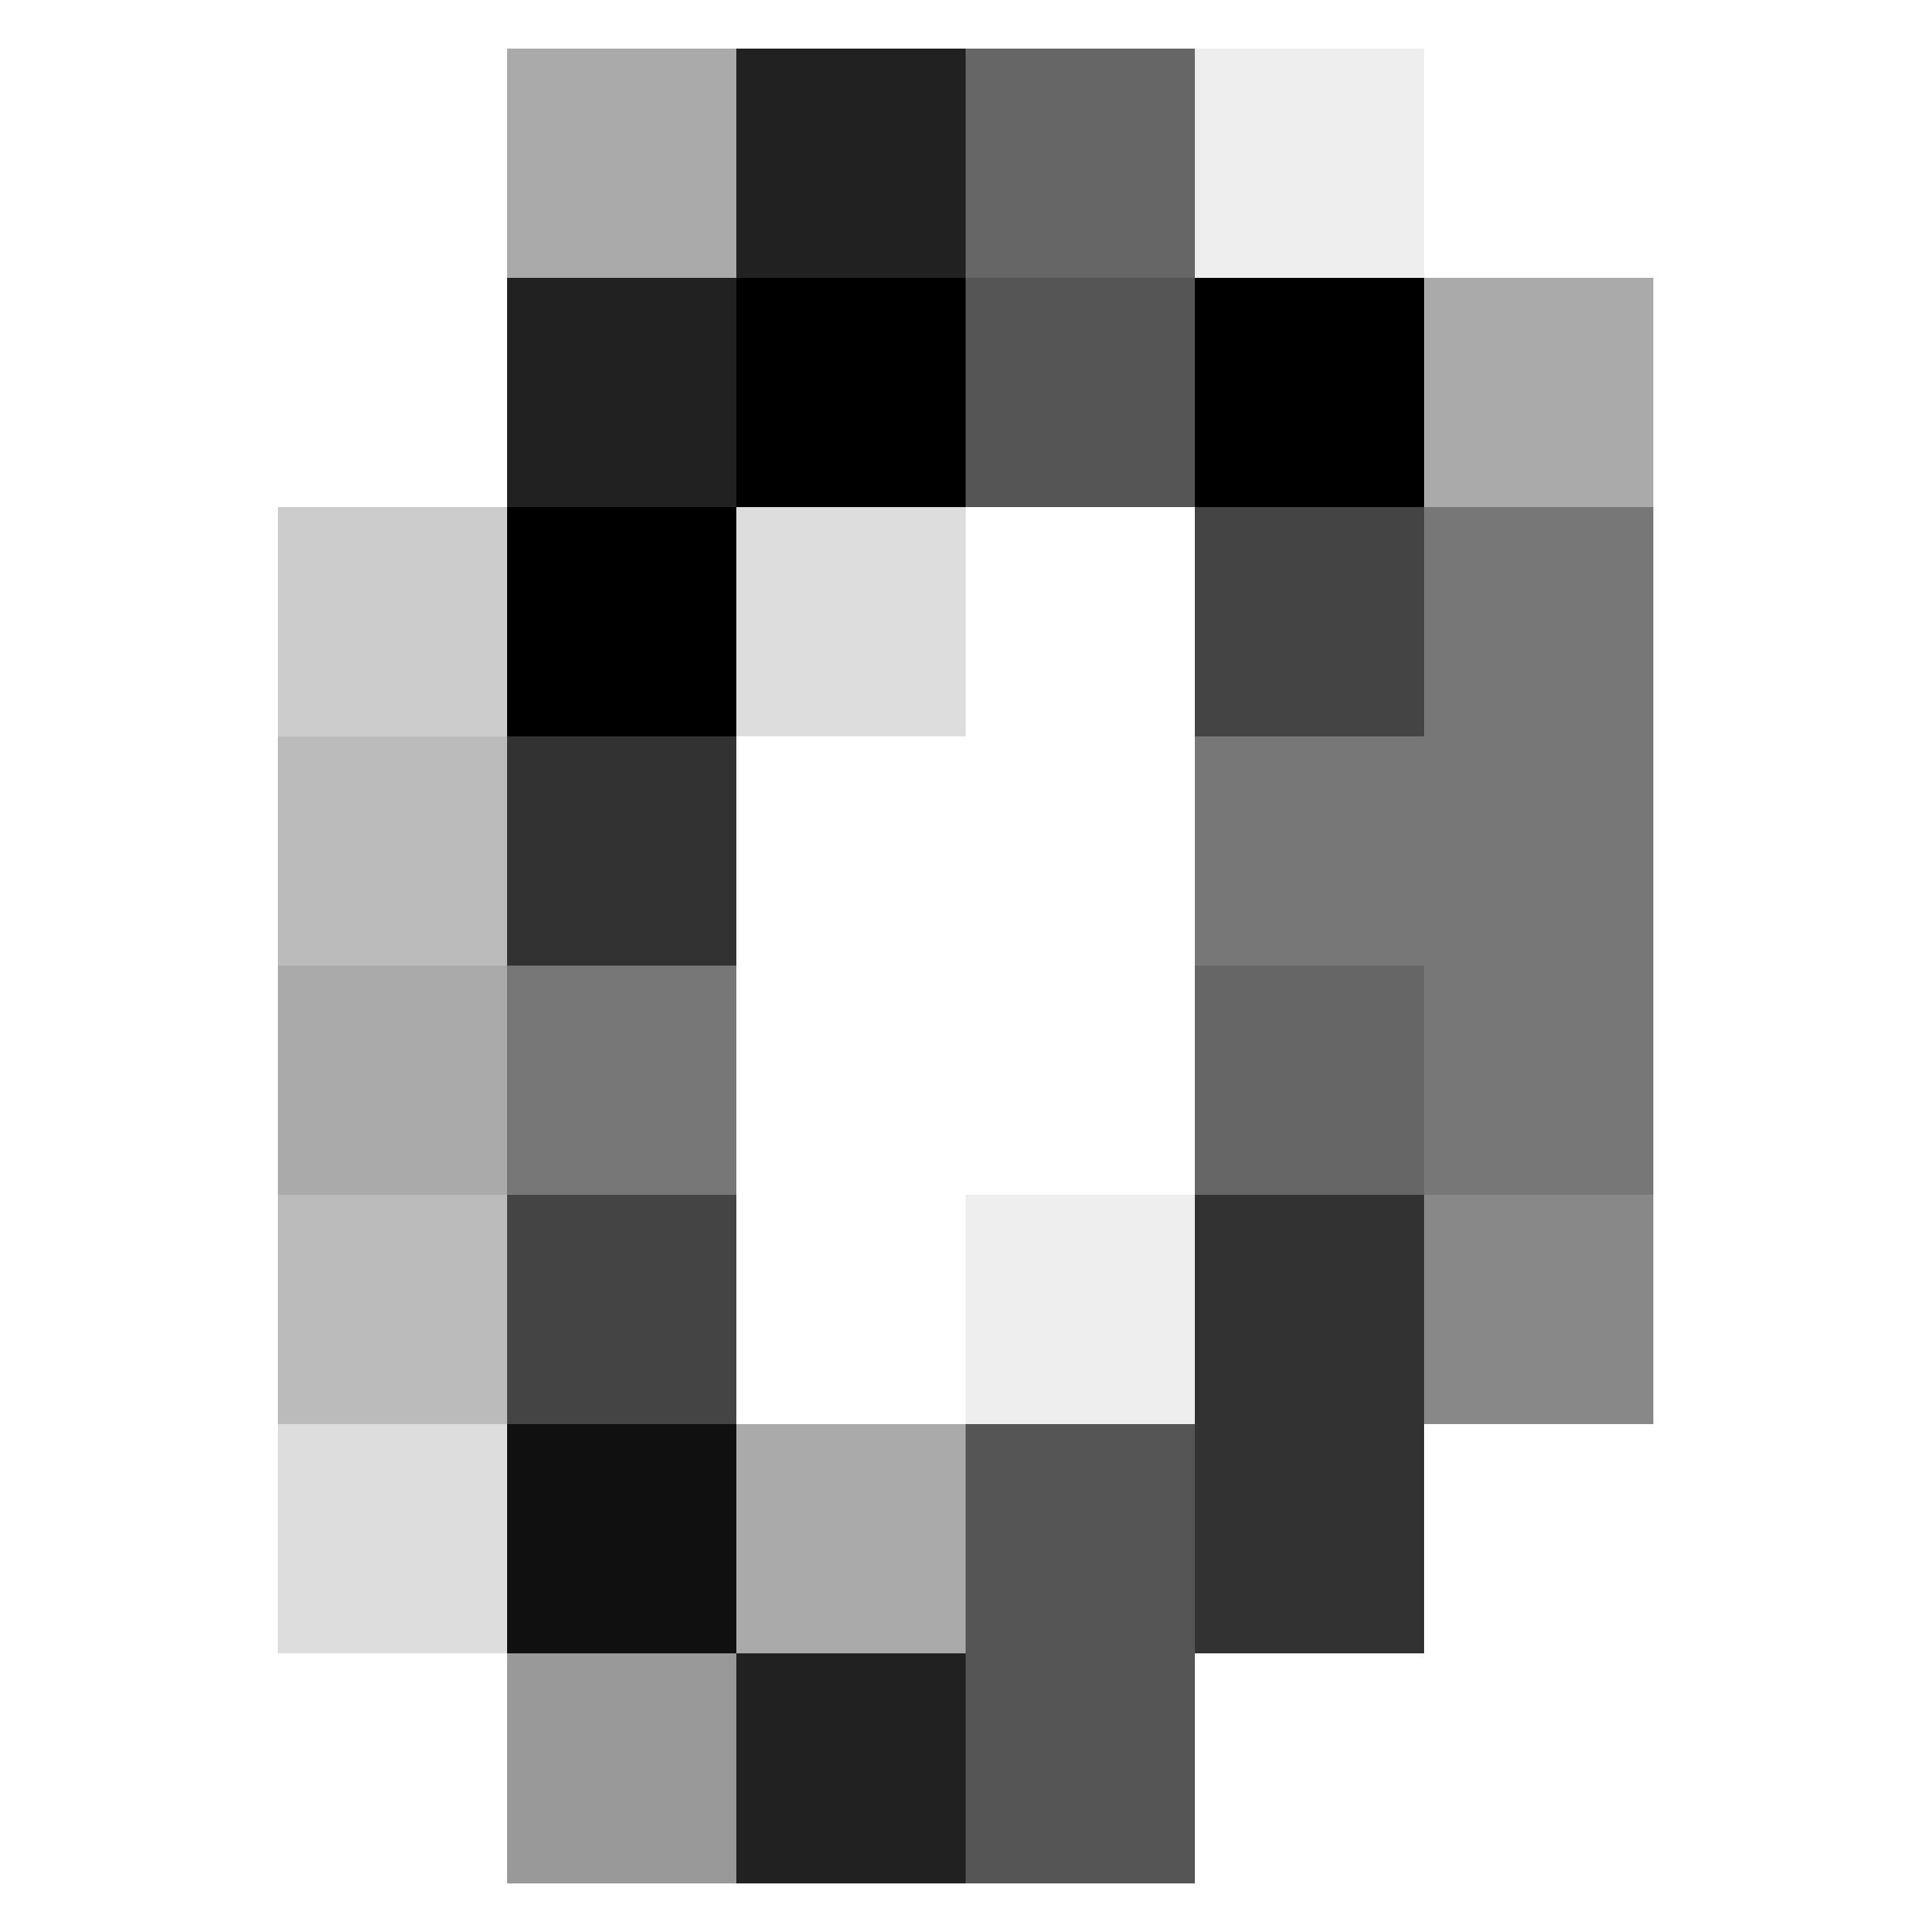

In [64]:
plt.imshow(digits.images[0, :, :], cmap=plt.cm.binary)
plt.axis("off")

(-0.5, 7.5, 7.5, -0.5)

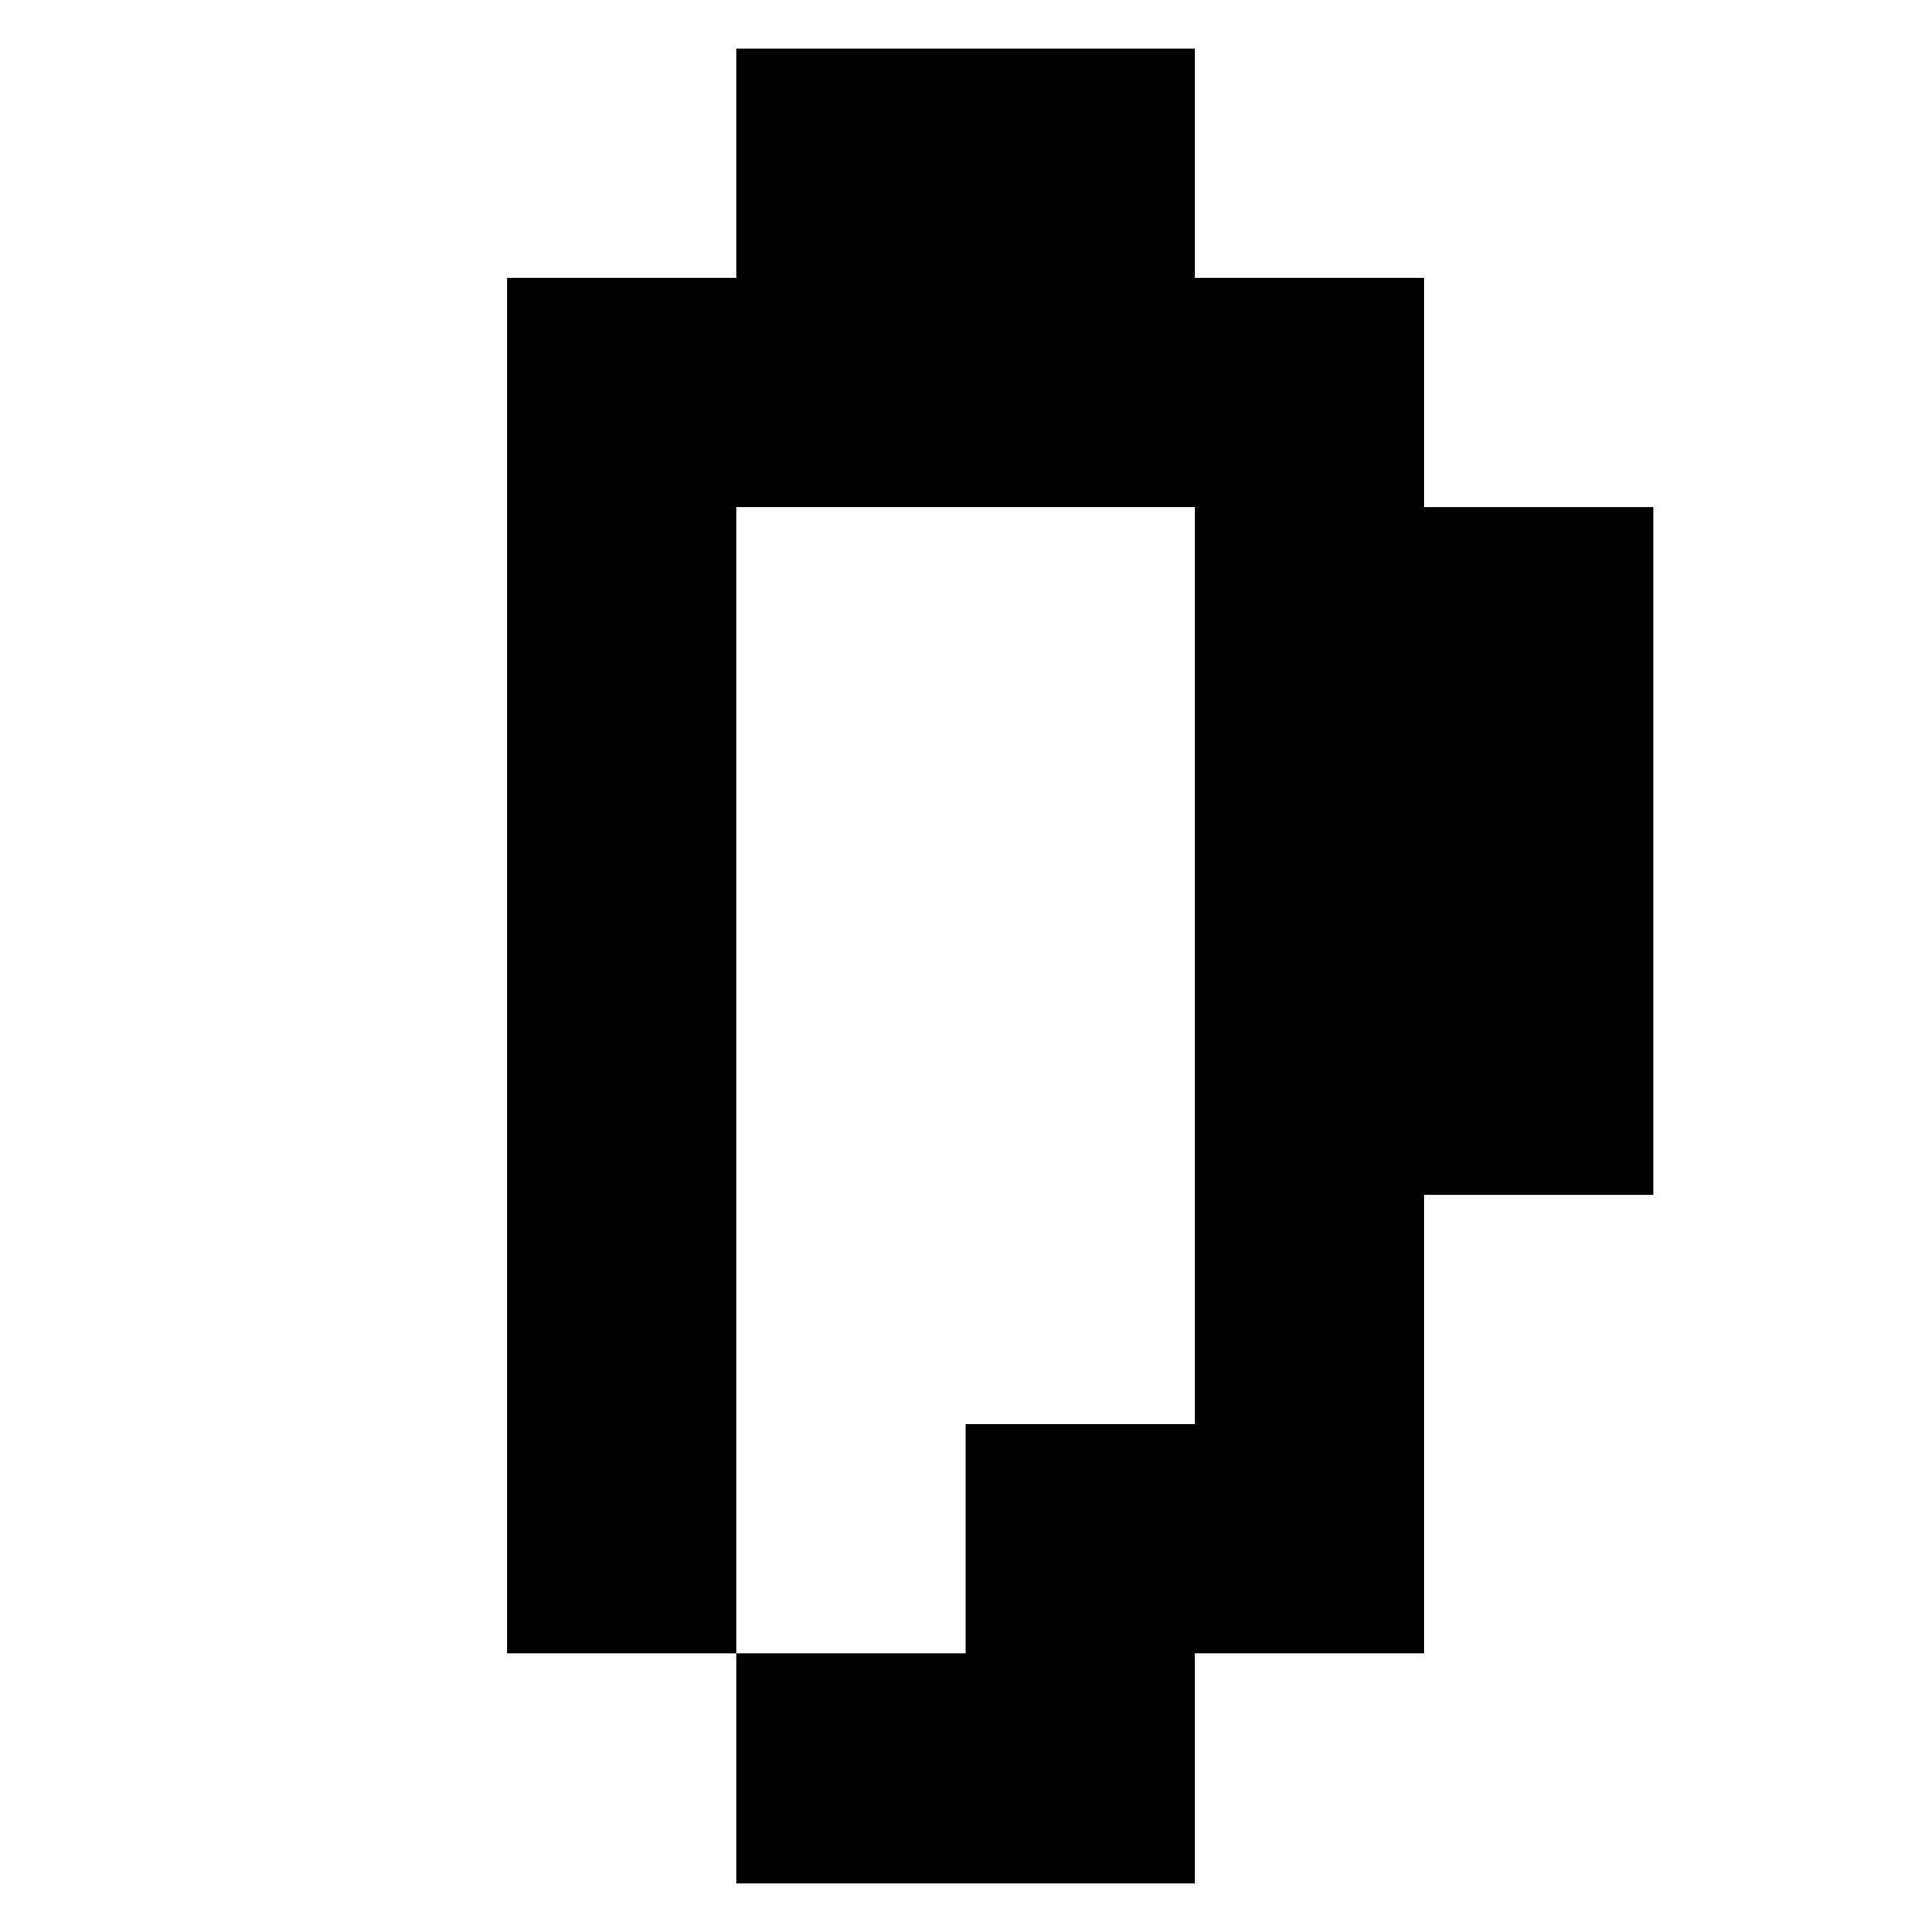

In [67]:
# 바이너라이즈 하면 위의 이미지가 이렇게 됨
plt.imshow(Binarizer(7).fit_transform(digits.images[0, :, :]), cmap=plt.cm.binary)
plt.axis("off")

연습문제 2

In [71]:
from sklearn.datasets import load_digits
digits = load_digits()
X = digits.data
y = digits.target
from sklearn.preprocessing import Binarizer
X = Binarizer(7).fit_transform(X)

from sklearn.naive_bayes import BernoulliNB
model_bern = BernoulliNB().fit(X, y)

In [75]:
from sklearn.metrics import classification_report

print(classification_report(y, model_bern.predict(X)))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       178
           1       0.80      0.80      0.80       182
           2       0.91      0.90      0.91       177
           3       0.93      0.85      0.89       183
           4       0.96      0.94      0.95       181
           5       0.92      0.88      0.90       182
           6       0.97      0.96      0.97       181
           7       0.91      0.99      0.95       179
           8       0.80      0.82      0.81       174
           9       0.80      0.87      0.83       180

    accuracy                           0.90      1797
   macro avg       0.90      0.90      0.90      1797
weighted avg       0.90      0.90      0.90      1797



In [79]:
from sklearn.datasets import load_digits
digits = load_digits()
X = digits.data
y = digits.target

from sklearn.naive_bayes import BernoulliNB
model_bern2 = BernoulliNB(binarize=7).fit(X, y)

In [80]:
from sklearn.metrics import classification_report

print(classification_report(y, model_bern2.predict(X)))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       178
           1       0.80      0.80      0.80       182
           2       0.91      0.90      0.91       177
           3       0.93      0.85      0.89       183
           4       0.96      0.94      0.95       181
           5       0.92      0.88      0.90       182
           6       0.97      0.96      0.97       181
           7       0.91      0.99      0.95       179
           8       0.80      0.82      0.81       174
           9       0.80      0.87      0.83       180

    accuracy                           0.90      1797
   macro avg       0.90      0.90      0.90      1797
weighted avg       0.90      0.90      0.90      1797



In [76]:
theta = np.exp(model_bern.feature_log_prob_)
theta

array([[0.00555556, 0.00555556, 0.15      , 0.97777778, 0.86111111,
        0.11666667, 0.00555556, 0.00555556, 0.00555556, 0.01666667,
        0.90555556, 0.93333333, 0.82222222, 0.83888889, 0.02777778,
        0.00555556, 0.00555556, 0.1       , 0.97222222, 0.32777778,
        0.08888889, 0.92222222, 0.11111111, 0.00555556, 0.00555556,
        0.23333333, 0.93333333, 0.09444444, 0.00555556, 0.67222222,
        0.43888889, 0.00555556, 0.00555556, 0.31111111, 0.91111111,
        0.03333333, 0.00555556, 0.61666667, 0.61666667, 0.00555556,
        0.00555556, 0.05555556, 0.97222222, 0.07777778, 0.06111111,
        0.84444444, 0.36111111, 0.00555556, 0.00555556, 0.00555556,
        0.94444444, 0.71666667, 0.72777778, 0.92222222, 0.09444444,
        0.00555556, 0.00555556, 0.00555556, 0.13333333, 0.98888889,
        0.94444444, 0.3       , 0.00555556, 0.00555556],
       [0.00543478, 0.00543478, 0.10326087, 0.6576087 , 0.76630435,
        0.42391304, 0.02173913, 0.00543478, 0.00543478, 0.0

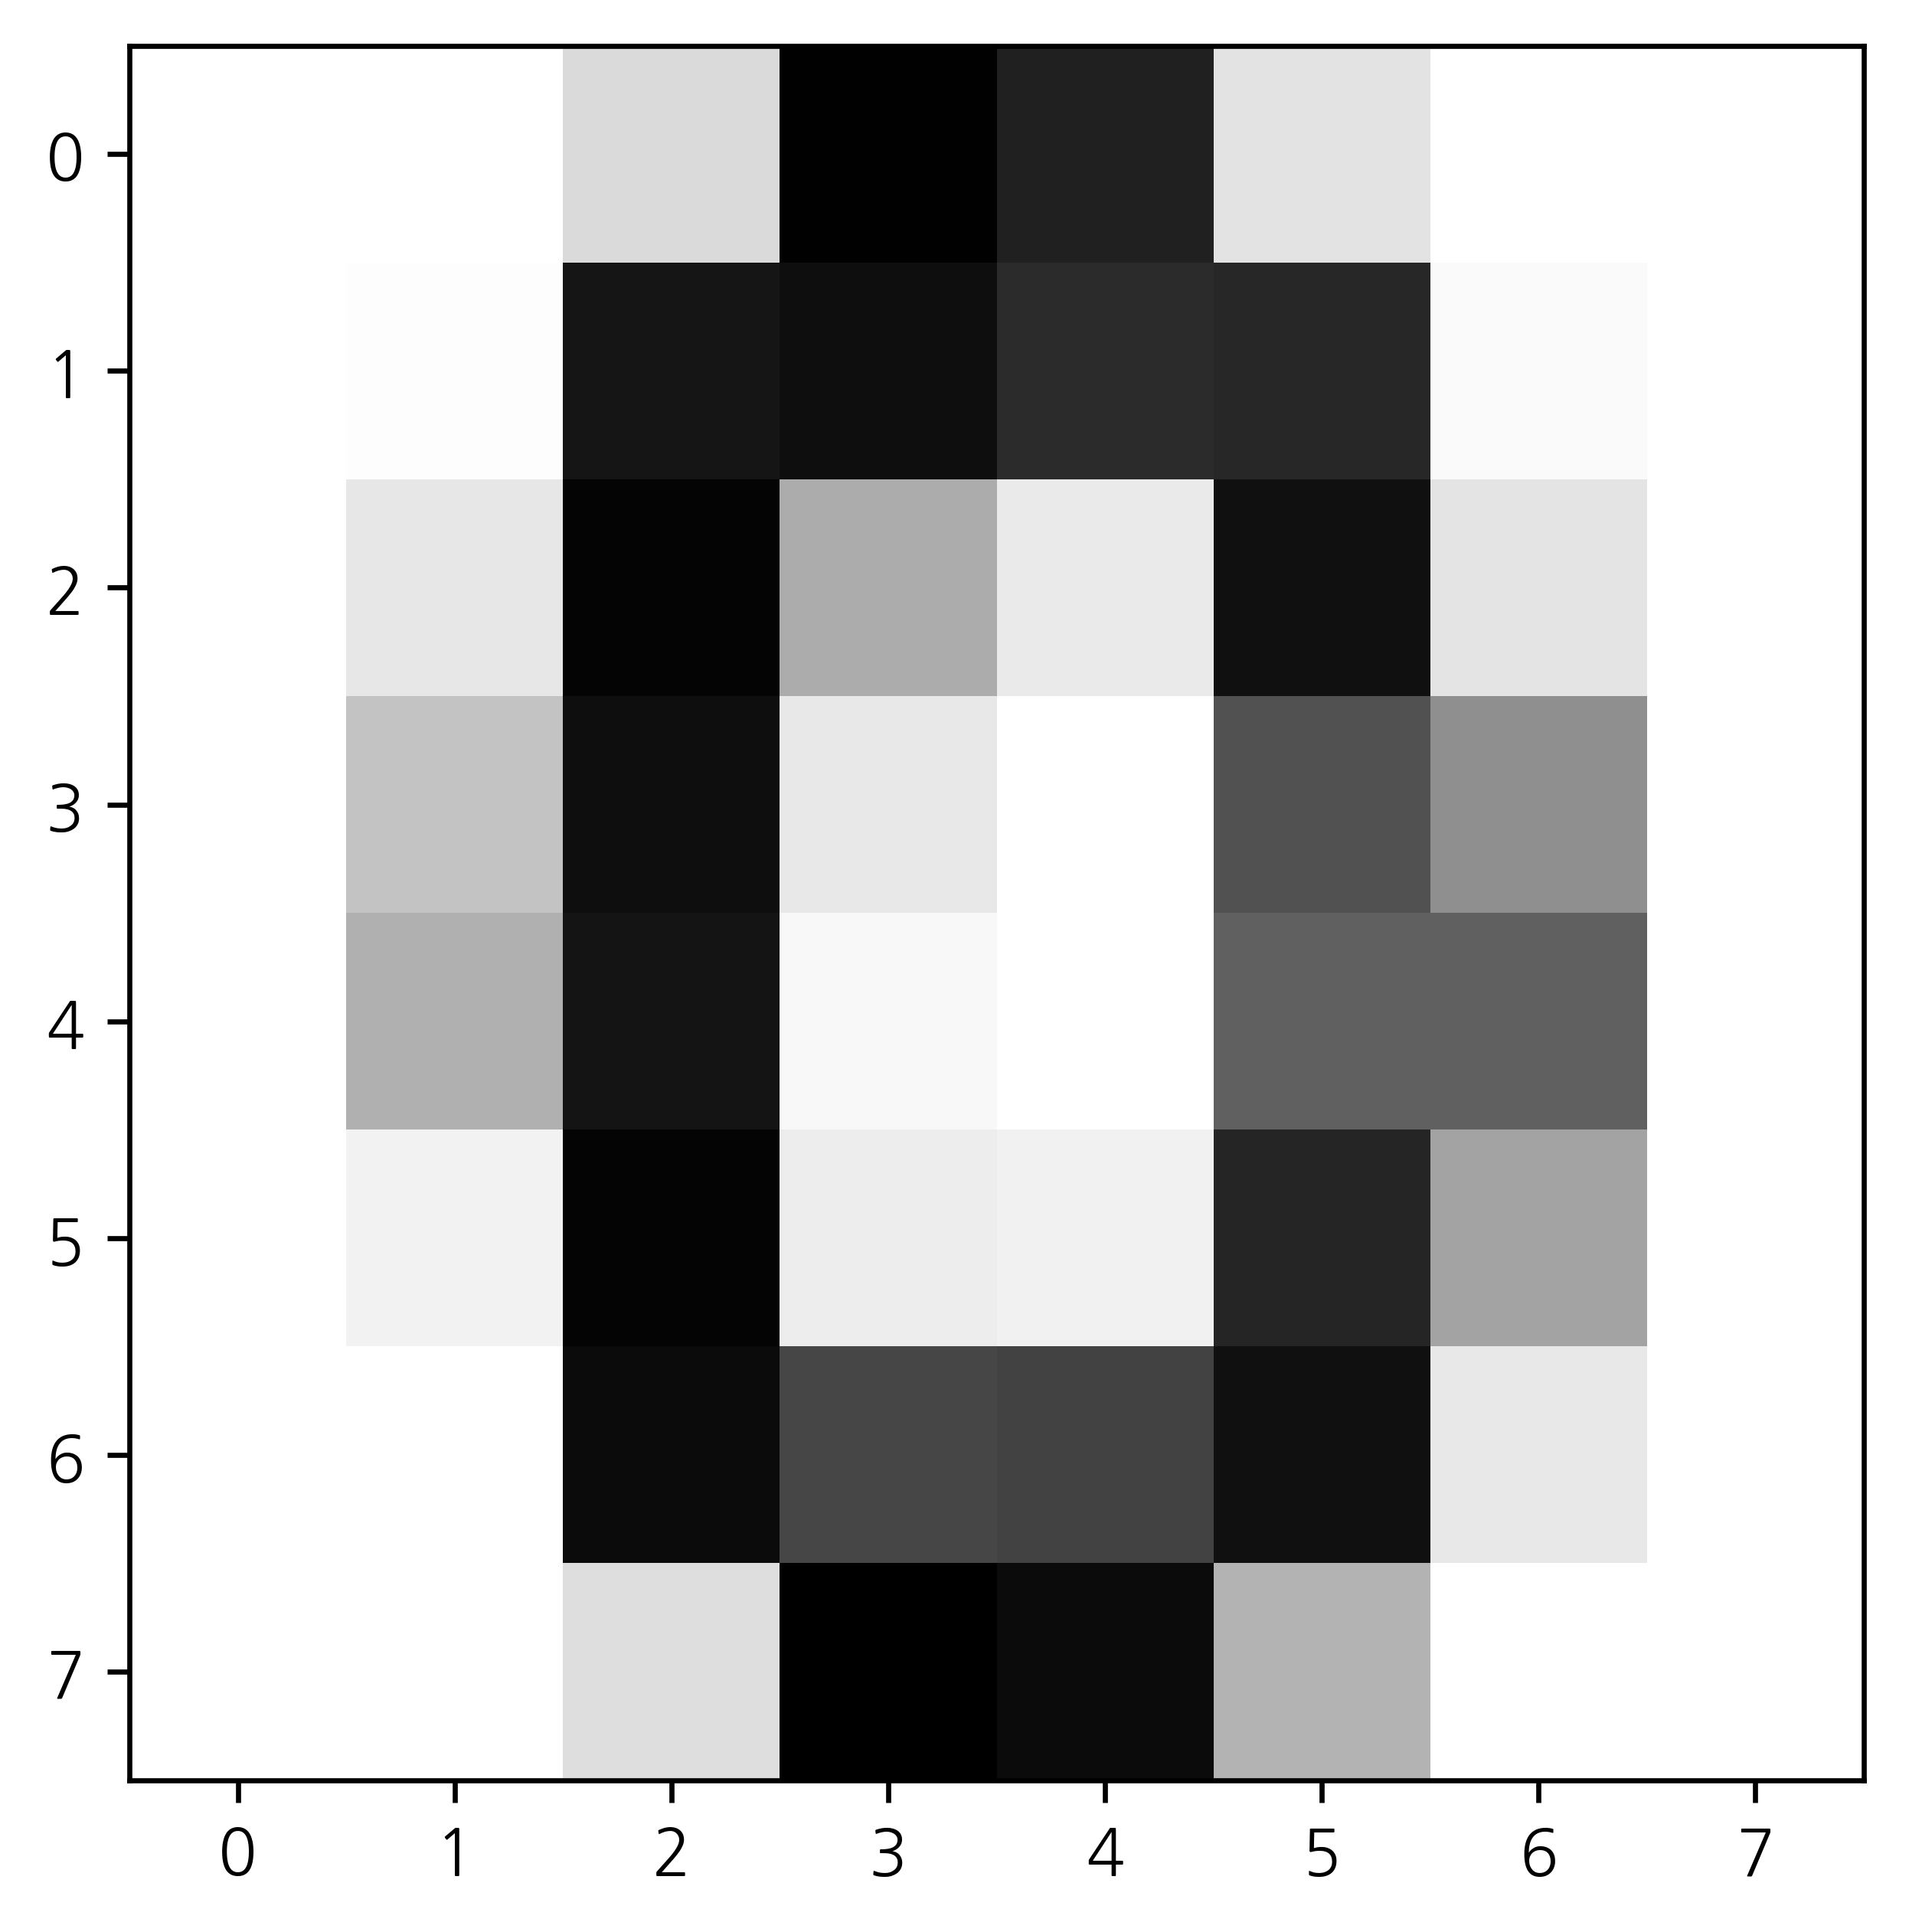

In [81]:
a = np.reshape(theta[0], (8,8))
plt.imshow(a, plt.cm.binary)

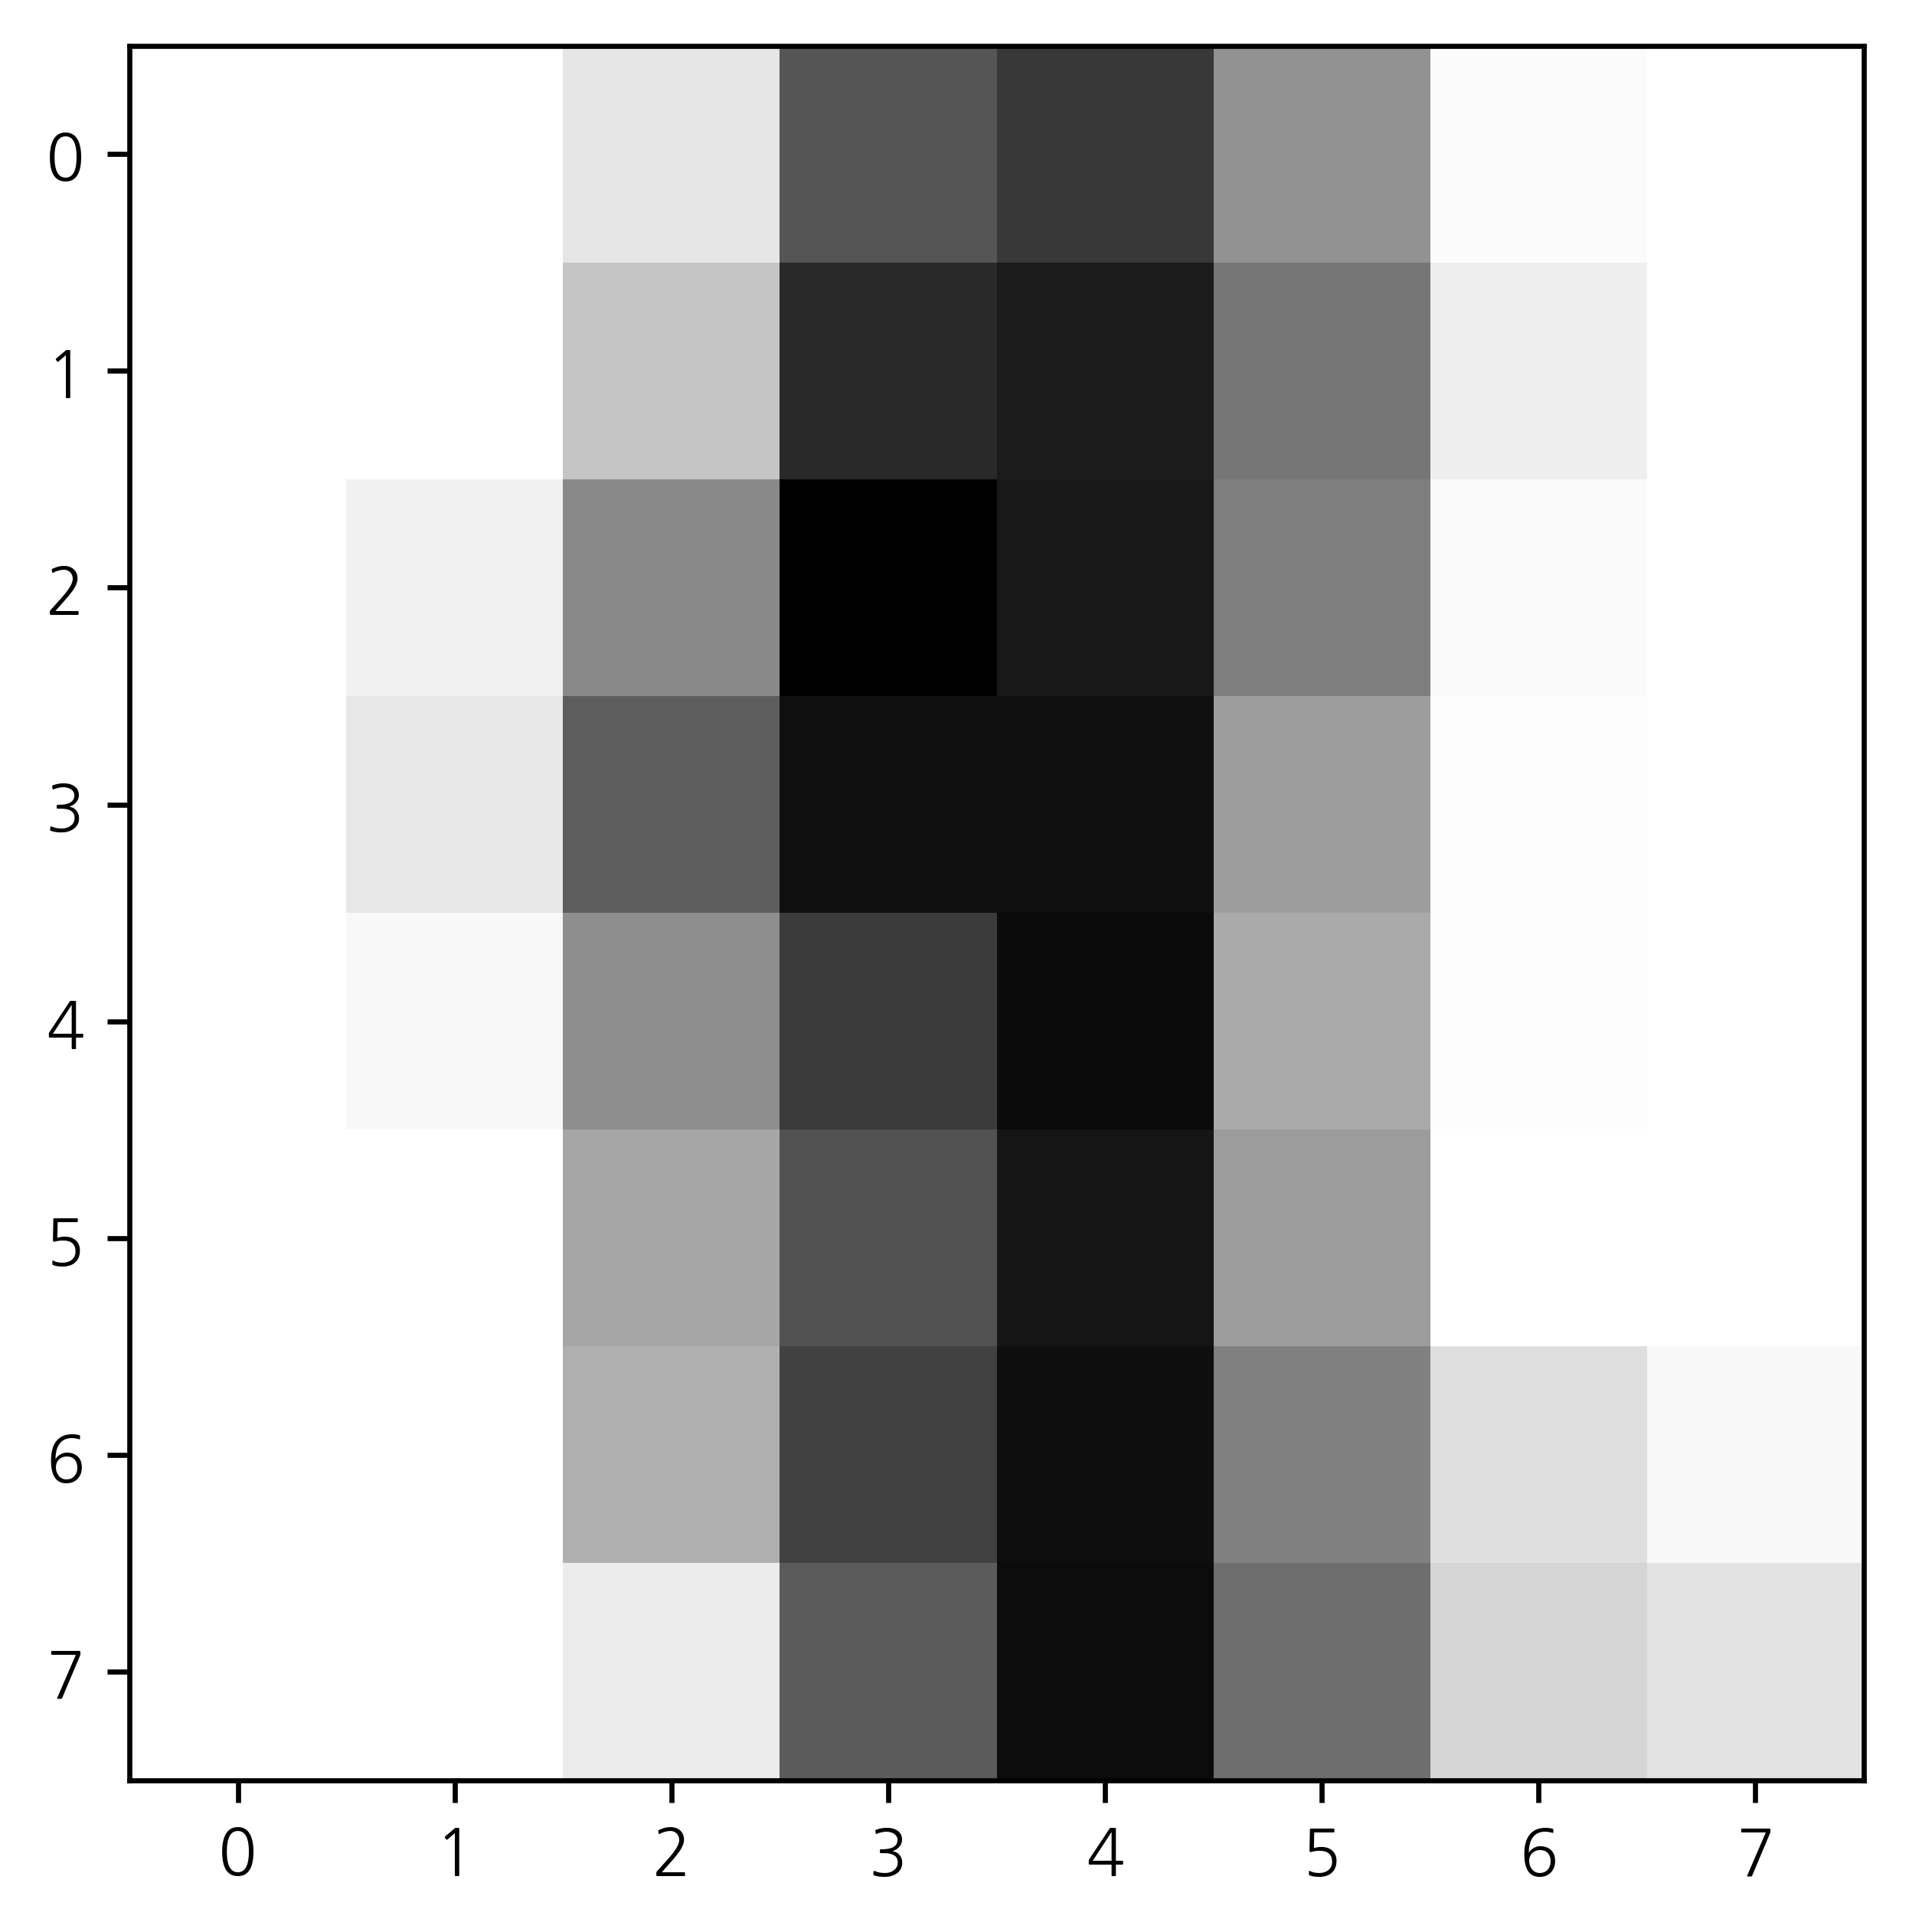

In [82]:
b = np.reshape(theta[1], (8,8))
plt.imshow(b, plt.cm.binary)

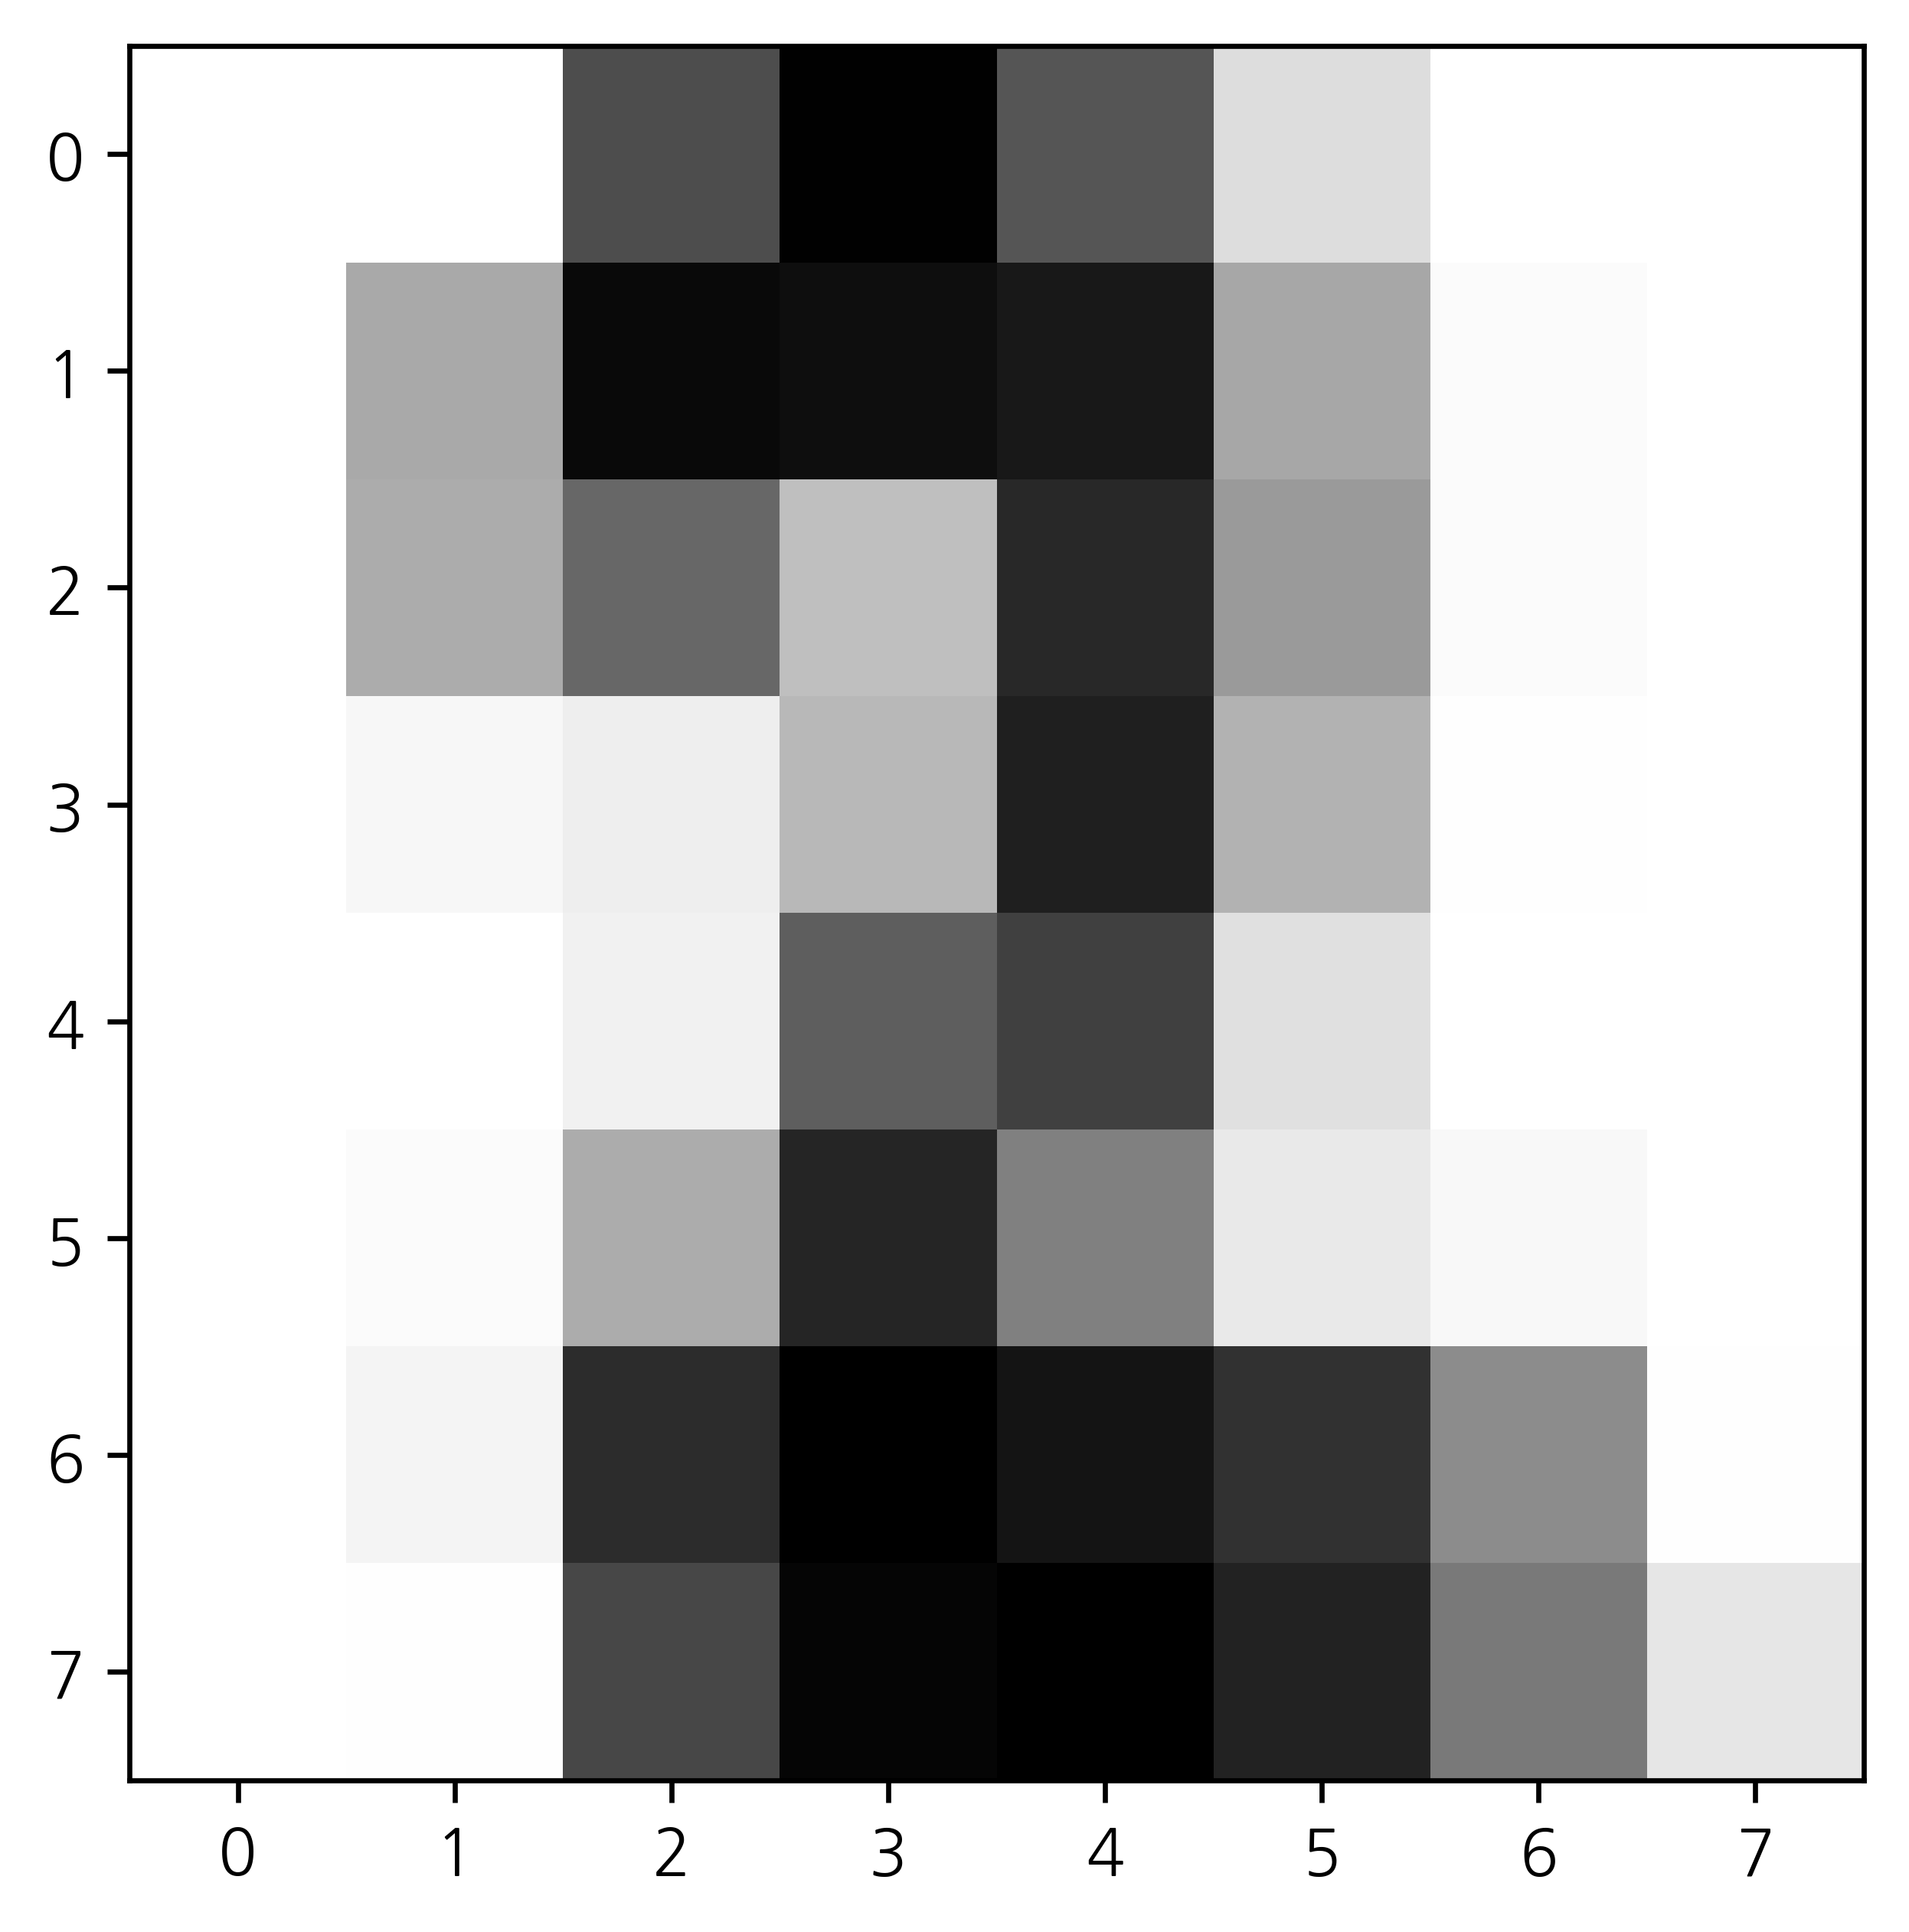

In [83]:
c = np.reshape(theta[2], (8,8))
plt.imshow(c, plt.cm.binary)